In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

import src.utilities as utils
from src.slide_utilities import *

In [2]:
adata = sc.read_h5ad("adata/adata_nichepca_with_domain_tuned_v1.h5ad")

In [17]:
cell_types = adata.obs['celltype_l1']
clusters = adata.obs['nichepca_domain']

contingency_table = pd.crosstab(clusters, cell_types)
contingency_table = np.log10(contingency_table)

In [22]:
cell_types_ordered = ['podocyte', 'mesangial cell', 'PEC',
                      'PT', 'CNT', 'DCT', 'ATL', 'DTL', 'TAL',
                      'PC', 'IC']
domain_ordered = ['Glom.', 'Prox. Tubule', 'DistaL Con. Tubule']
contingency_table = contingency_table.loc[domain_ordered, cell_types_ordered]

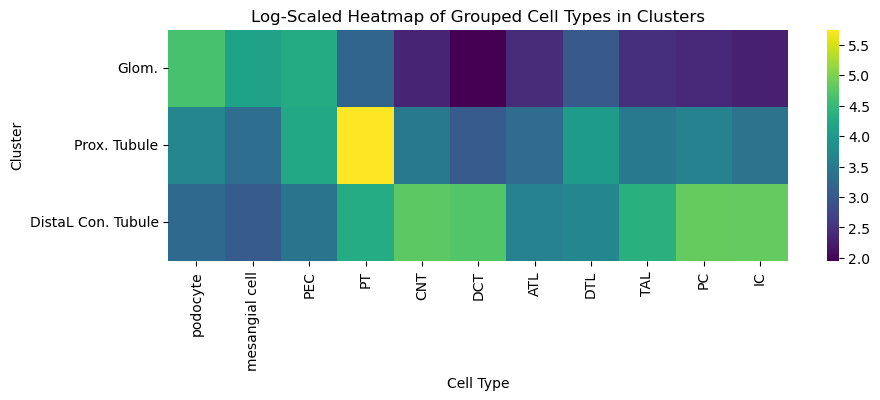

In [26]:
plt.figure(figsize=(10, 3))  # Width: 12 inches, Height: 10 inches
sns.heatmap(contingency_table, annot=False, cmap="viridis")
plt.title("Log-Scaled Heatmap of Grouped Cell Types in Clusters")
plt.xlabel("Cell Type")
plt.ylabel("Cluster")
plt.show()

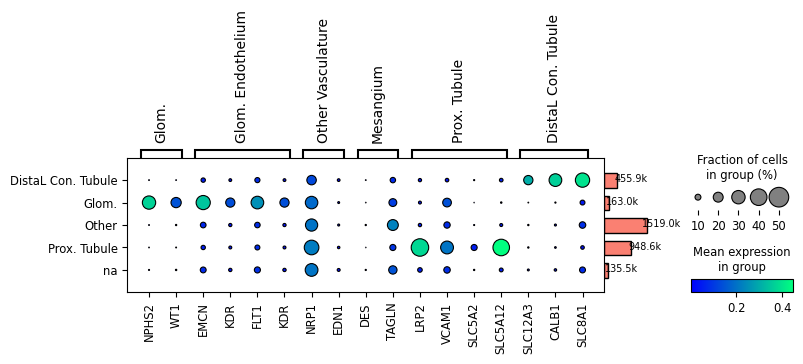

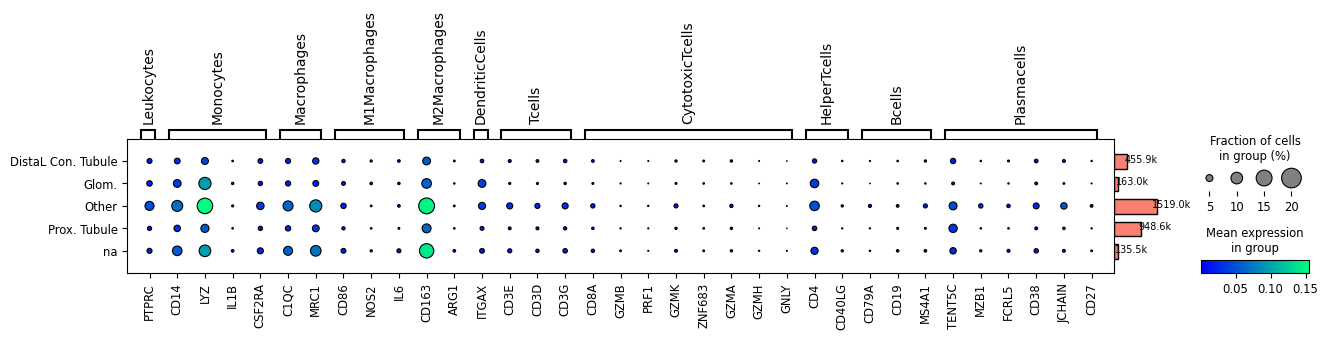

In [29]:
Markers = remove_extra_genes(KidneyCellMarkers, adata)
dp = sc.pl.dotplot(adata, Markers, groupby='nichepca_domain', use_raw=False, return_fig=True)
dp.style(dot_edge_color='black', dot_edge_lw=.8)
dp.add_totals()
# dp.savefig("marker.pdf")
dp.show()

# Immunological enrichment
Markers = remove_extra_genes(ImmuneMarkers, adata)
dp = sc.pl.dotplot(adata, Markers, groupby='nichepca_domain', use_raw=False, return_fig=True)
dp.style(dot_edge_color='black', dot_edge_lw=.8)
dp.add_totals()
dp.show()

In [2]:
adata = sc.read_h5ad("adata/adata_nichepca_with_domain_tuned_v1.h5ad")

In [3]:
adata_with_clusters = sc.read_h5ad("data/adata_nichepca_slide_clustered_tmp.h5ad")

In [4]:
adata_with_clusters.obs

,x,y,z,cluster,n_transcripts,density,elongation,area,avg_confidence,avg_assignment_confidence,...,all_slide_leiden_0.1,all_slide_leiden_0.3,all_slide_leiden_0.5,per_slide_leiden_0.1_1,per_slide_leiden_0.1_2,per_slide_leiden_0.2_1,per_slide_leiden_0.2_2,per_slide_leiden_0.3_1,per_slide_leiden_0.3_2,per_slide_is_glom_tmp
cell_CRfb095a77d-1,2285.790178,1164.057381,32.829188,1,79,2.0240,2.141,39.03,0.9975,0.9916,...,0,0,0,1,1,0,3,0,3,0
cell_CRfb095a77d-2,2298.342622,1219.741069,31.465535,4,32,1.0850,4.614,29.50,0.9771,0.9288,...,0,0,0,1,1,0,3,0,3,0
cell_CRfb095a77d-3,2271.434052,1245.859500,32.062796,2,67,3.0590,2.990,21.90,0.9971,0.9884,...,3,2,2,0,3,3,4,3,4,0
cell_CRfb095a77d-5,2257.346907,1259.955827,31.273945,2,56,2.1420,9.229,26.14,0.9964,0.9707,...,3,2,2,0,3,3,4,3,4,0
cell_CRfb095a77d-6,2277.712022,1237.595244,35.395148,2,9,1.6980,3.283,5.30,0.9826,0.9400,...,2,3,3,0,3,3,4,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_CRc71d71060-597925,2747.360264,4957.516627,24.097605,2,73,1.5480,3.617,47.15,0.9971,0.6334,...,2,3,3,0,0,0,0,0,3,0
cell_CRc71d71060-598041,4592.548620,1655.438877,24.254944,2,35,0.9893,1.844,35.38,0.9951,0.6206,...,2,3,3,0,0,0,0,0,0,0
cell_CRc71d71060-598270,8540.113826,9224.561804,19.515240,3,46,1.3870,2.667,33.16,0.9969,0.7152,...,2,3,1,0,0,0,0,0,0,0
cell_CRc71d71060-598508,4264.902000,2582.697217,25.121288,3,24,1.1420,5.004,21.02,0.9914,0.7517,...,2,3,3,0,0,0,5,0,3,0


In [5]:
adata.obs['nichepca_all_slide_leiden_0.1'] = adata_with_clusters.obs['all_slide_leiden_0.1']
adata.obs['nichepca_all_slide_leiden_0.3'] = adata_with_clusters.obs['all_slide_leiden_0.3']
adata.obs['nichepca_all_slide_leiden_0.5'] = adata_with_clusters.obs['all_slide_leiden_0.5']

adata.obs['nichepca_per_slide_leiden_0.1'] = adata_with_clusters.obs['per_slide_leiden_0.1_1']
adata.obs['nichepca_per_slide_leiden_0.2'] = adata_with_clusters.obs['per_slide_leiden_0.2_1']
adata.obs['nichepca_per_slide_leiden_0.3'] = adata_with_clusters.obs['per_slide_leiden_0.3_1']

In [6]:
adata.obs

,x,y,z,cluster,n_transcripts,density,elongation,area,avg_confidence,avg_assignment_confidence,...,label,nichepca_domain,nichepca_domain_tuned,nichepca_glom_no,nichepca_all_slide_leiden_0.1,nichepca_all_slide_leiden_0.3,nichepca_all_slide_leiden_0.5,nichepca_per_slide_leiden_0.1,nichepca_per_slide_leiden_0.2,nichepca_per_slide_leiden_0.3
cell_CRfb095a77d-1,2285.790178,1164.057381,32.829188,1,79,2.0240,2.141,39.03,0.9975,0.9916,...,SLE,Prox. Tubule,Other,Other,0,0,0,1,0,0
cell_CRfb095a77d-2,2298.342622,1219.741069,31.465535,4,32,1.0850,4.614,29.50,0.9771,0.9288,...,SLE,Prox. Tubule,Other,Other,0,0,0,1,0,0
cell_CRfb095a77d-3,2271.434052,1245.859500,32.062796,2,67,3.0590,2.990,21.90,0.9971,0.9884,...,SLE,DistaL Con. Tubule,Other,Other,3,2,2,0,3,3
cell_CRfb095a77d-5,2257.346907,1259.955827,31.273945,2,56,2.1420,9.229,26.14,0.9964,0.9707,...,SLE,DistaL Con. Tubule,Other,Other,3,2,2,0,3,3
cell_CRfb095a77d-6,2277.712022,1237.595244,35.395148,2,9,1.6980,3.283,5.30,0.9826,0.9400,...,SLE,DistaL Con. Tubule,Other,Other,2,3,3,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_CRc71d71060-597925,2747.360264,4957.516627,24.097605,2,73,1.5480,3.617,47.15,0.9971,0.6334,...,SLE,Other,Other,Other,2,3,3,0,0,0
cell_CRc71d71060-598041,4592.548620,1655.438877,24.254944,2,35,0.9893,1.844,35.38,0.9951,0.6206,...,SLE,Other,Other,Other,2,3,3,0,0,0
cell_CRc71d71060-598270,8540.113826,9224.561804,19.515240,3,46,1.3870,2.667,33.16,0.9969,0.7152,...,GBM,Other,Other,Other,2,3,1,0,0,0
cell_CRc71d71060-598508,4264.902000,2582.697217,25.121288,3,24,1.1420,5.004,21.02,0.9914,0.7517,...,SLE,Other,Other,Other,2,3,3,0,0,0


In [7]:
adata.write("data/adata_nichepca_with_domain_tuned_v2.h5ad")